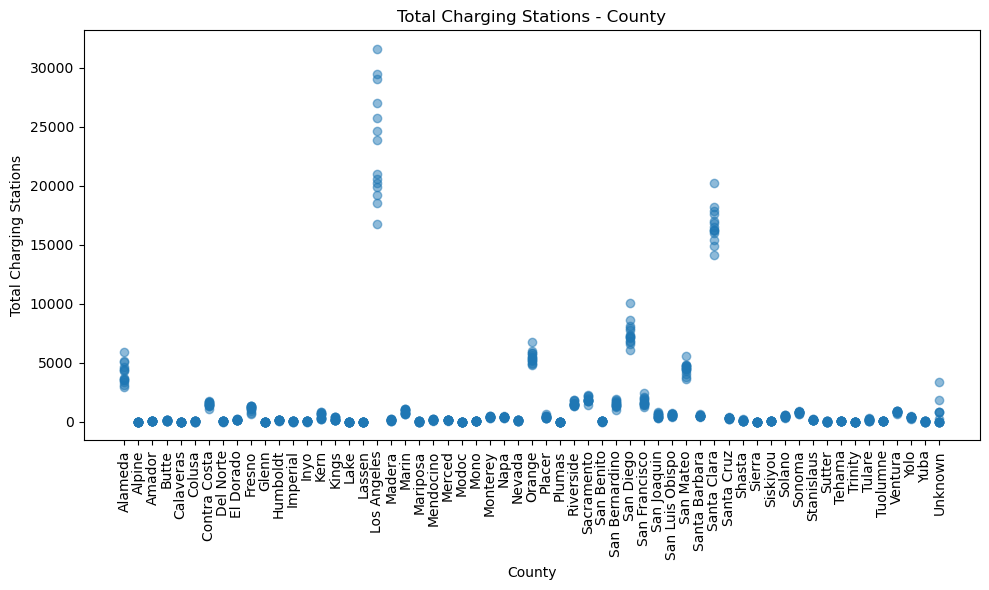

In [1]:
import pandas as pd

# Read data from the Excel file
data_file = "EV_Chargers_Last_updated_03-01-2024_ada.csv"
dfs = pd.read_excel(data_file, sheet_name=None)

# Initialize lists to store total charging stations and counties
total_charging_stations = []
counties = []

# Iterate over each sheet and extract data
for sheet_name, df in dfs.items():
    if "Total" in df.columns and "County" in df.columns:
        total_charging_stations.extend(df["Total"])
        counties.extend(df["County"])

# Create a scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(counties, total_charging_stations, alpha=0.5)
plt.title("Total Charging Stations - County")
plt.xlabel("County")
plt.ylabel("Total Charging Stations")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()